# **speed = 10 / place = 10 / place noise variance = 0.5 /speed noise variance = 0.2**

In [7]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[10.] , [10.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 5 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        print(self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

[[10.0], [1.0]] self.x = 2
[10.86976122  9.94164199]  new 
[11.82353222  9.84844678]  new 
[13.07190552  9.59055544]  new 
[13.65741498  9.34304252]  new 
[14.34904387  9.16882983]  new 
[15.08287278  8.57533289]  new 
[15.93200752  8.14953332]  new 
[16.57610268  8.18705347]  new 
[17.58902439  8.15392766]  new 
[19.12630973  7.81647424]  new 
[20.31766267  7.54866014]  new 
[20.53164743  6.92399164]  new 
[21.43108824  6.68071264]  new 
[22.03185465  6.06264739]  new 
[23.32804089  5.90580782]  new 
[23.17090227  5.39705425]  new 
[24.49924295  5.10261172]  new 
[24.91178211  4.82736534]  new 
[25.01370229  4.51314553]  new 
[26.01605931  4.15683793]  new 
[25.63257265  3.30961392]  new 
[25.77378447  3.03338084]  new 
[25.25656821  2.79238711]  new 
[25.15384601  2.46762787]  new 
[25.36918018  2.28638134]  new 
[25.05486768  2.05964616]  new 
[24.87321337  1.93761738]  new 
[25.13200249  1.76600145]  new 
[24.60695851  1.53965913]  new 
[25.20758743  1.27848852]  new 
[25.57605579 

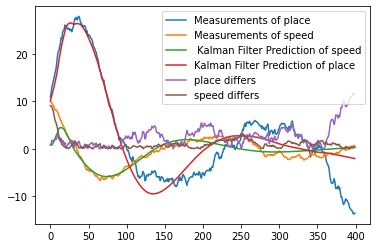

In [20]:


def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 400)
  noise2 = np.random.normal(0, 0.2, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer ,' new ')
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    # print(a)
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)

  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 10 / place noise variance = 0.5 /speed noise variance = 1**

[[10.0], [1.0]] self.x = 2
[ 4.75787281e-03 -6.42191183e-01 -5.75789472e-01  4.27457516e-01
 -6.05727863e-01 -6.44581022e-01  6.03936708e-02 -3.46754296e-01
  2.52810555e-01 -1.35233597e-01 -1.24056336e-01  7.16345860e-01
 -1.95850467e-01 -2.34708666e-01 -8.15301081e-01  1.87400163e-01
 -3.59030603e-01 -2.08454055e-01  4.13291784e-02 -2.54062109e-02
 -3.84032418e-01 -6.16844411e-01 -5.24154968e-01  6.91989646e-01
 -1.52806387e-01 -3.00039047e-01 -4.40758577e-01  4.59286225e-02
 -4.67105200e-01 -5.38549490e-01  4.37104214e-01 -1.64310154e-01
  5.89540775e-01  1.16711908e+00  5.43440748e-01  1.05724367e-02
 -1.69200029e-01  1.00035147e+00  2.85703135e-01 -1.16353225e-01
  8.40143921e-01 -5.50502663e-01 -6.05925811e-01 -5.80238869e-02
 -1.14304977e-01 -3.67466088e-01 -4.67175555e-02  3.78345186e-01
  6.07053776e-01 -1.72274666e-02 -6.63260554e-01  1.68568143e-01
 -5.39254196e-01 -8.60997023e-01  2.05604113e-02 -1.28722838e-01
 -1.91817027e-01 -1.03518035e+00  1.42068500e-01 -1.39983420e-0

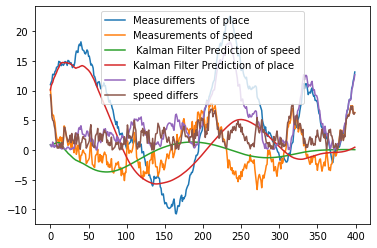

In [23]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 400)
  print(noise1)
  noise2 = np.random.normal(0, 1, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 10 / place noise variance = 0.5 /speed noise variance = 0.01**

[[10.0], [1.0]] self.x = 2
[-1.74643935e-01 -1.46696408e-01  4.20836971e-01 -9.73289956e-02
  4.45020715e-01 -1.55533422e-01  5.78342604e-02 -2.54627335e-01
 -3.05060232e-01 -2.14041563e-02 -4.77297583e-03  4.48872512e-01
 -3.30078862e-01  7.15673022e-01 -7.96717022e-02 -2.37406019e-01
  2.79696736e-01 -2.19160226e-01  8.91259621e-01  8.96766761e-01
 -5.10638097e-01  2.36245344e-01 -6.40352122e-01 -2.45770084e-01
 -2.20218624e-01  8.87333331e-01  1.89034005e-02  3.36339547e-01
 -2.84271144e-01  4.95649514e-01 -1.00674682e-01  8.11155837e-01
  5.39435477e-01  2.12170333e-01  3.61182025e-01  5.04565806e-01
 -1.95592112e-01  3.48757902e-01  1.24285406e-01 -1.70044282e-01
  2.03493349e-01 -1.06867734e+00 -1.20606619e+00 -2.80763925e-01
 -5.02564447e-02 -4.95386361e-01 -6.18044443e-01 -8.77668401e-01
 -8.09816082e-02  3.07947622e-01  3.55302483e-01  7.11965715e-01
 -4.72179544e-01  2.38133110e-03  6.28229452e-01  1.37485581e-01
  2.11345527e-01  3.40726277e-01  1.46697987e-01 -7.84666772e-0

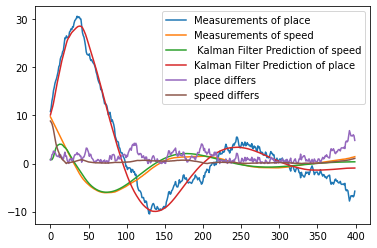

In [24]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 400)
  print(noise1)
  noise2 = np.random.normal(0, 0.01, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 10 / place noise variance = 0.2 /speed noise variance = 2**

[[10.0], [1.0]] self.x = 2
[-8.07368177e-01  3.54014629e-01 -5.38378290e-02  1.50342343e-01
  1.37976863e-01 -6.12544366e-01 -3.03168997e-02  3.32762850e-01
  5.35924747e-01 -2.07244938e-01 -1.79497339e-01  1.02940975e+00
 -2.88645234e-01  2.30914325e-01  8.36838910e-01 -3.22340918e-01
  3.72837675e-01  8.43578562e-01  3.19803306e-01 -1.72850186e-01
  5.69518779e-02 -2.69965561e-01  4.22892839e-02  1.32714331e-01
 -3.97305049e-01 -8.64409938e-01 -5.72323313e-01  2.02532440e-01
  3.32329470e-02  6.17045692e-01  1.42922995e-01  1.82642516e-01
  1.03930686e-01  7.74776442e-01  1.50683378e-02 -1.62452028e-01
  7.73496410e-02  6.49515806e-02 -4.96199792e-01  5.77283764e-01
 -5.66009539e-01  3.45381006e-01 -9.60307717e-01  3.09494980e-01
 -5.99352897e-01 -2.56060869e-01  3.78270900e-01  1.24894790e-01
 -6.01926340e-01 -2.89057705e-01  3.22368264e-01 -6.25533678e-01
 -1.22457970e-01 -6.91332414e-01  9.73290753e-02  4.77512671e-01
  1.14745433e-01  8.70996658e-01 -8.90418423e-01  2.80811603e-0

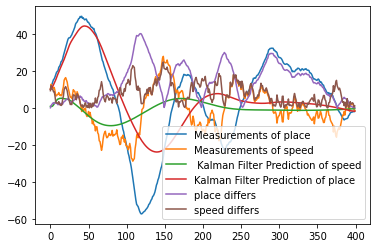

In [27]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.5, 400)
  print(noise1)
  noise2 = np.random.normal(0, 2, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# ***speed = 10 / place = 10 / place noise variance = 0.1 /speed noise variance = 1***

[[10.0], [1.0]] self.x = 2
[-0.04584795  0.09218963  0.02969501  0.13634323  0.19632818  0.01798945
  0.03205062 -0.12530177 -0.03686507 -0.04830187 -0.03315924 -0.16182138
 -0.14626593  0.02671205 -0.2740289  -0.14019924  0.04551952  0.01717013
  0.10702583 -0.17247087 -0.17732014 -0.12009579  0.03330513  0.03977011
 -0.02714916 -0.01150452 -0.04114857  0.01377061  0.0572734   0.07197383
  0.01902355  0.12372642 -0.05886372 -0.15141559  0.07345861  0.18206214
  0.02346959  0.04616317  0.07423379 -0.06408387 -0.15042677  0.13593202
 -0.07047725  0.08504454  0.12373086  0.18728236  0.10477287 -0.00699134
  0.18091868 -0.01989279  0.1288538   0.05874857  0.03400596 -0.12218439
 -0.03722945 -0.03760225 -0.12023266 -0.02690321  0.0749868   0.05316968
  0.03509101  0.06361674 -0.03778831 -0.00965224 -0.11332802 -0.01309865
 -0.0325237   0.11587283  0.14118248  0.07266124 -0.00118337 -0.07428101
  0.12051841  0.08962956  0.06825213 -0.00843782 -0.24728538  0.06240569
 -0.09190087  0.07702085

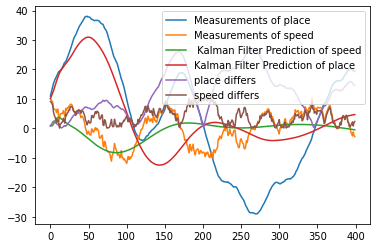

In [29]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 400)
  print(noise1)
  noise2 = np.random.normal(0, 1, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  print('kal' , predictions_speed)
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 10 / place noise variance = 1 /speed noise variance = 4**

[[10.0], [1.0]] self.x = 2
[-7.36975458e-01 -1.69975018e+00 -2.10252023e-01  3.54562942e-01
  4.81773086e-01  6.10451371e-01 -9.75696459e-01  2.17688499e-01
  2.35909330e+00  9.67750541e-01 -7.18738826e-01  4.81328374e-01
  1.31229137e+00  1.54204699e+00 -2.54384194e-01  7.68292197e-01
  5.15449020e-02  7.28037363e-01 -4.34794551e-01 -7.13287655e-01
 -9.57555590e-01 -8.46081163e-02  5.03113064e-01  1.09787945e+00
 -1.19695707e-01 -2.52458811e-01  7.62543562e-01 -1.34901808e+00
 -8.74186294e-01 -3.38968282e-01 -9.76221042e-01  1.46072416e+00
  2.75536529e-01  1.58523865e+00 -8.10496268e-01  3.15720188e-01
  6.29535239e-01 -1.86085684e+00  7.86530772e-01  1.99338402e+00
  6.64519637e-01  5.71548185e-01 -9.33199504e-01 -6.59026912e-01
 -1.33311472e-01  1.20872147e+00 -8.20890695e-01  4.74314970e-01
 -1.35741389e+00  2.49811879e-01 -6.64371680e-01 -1.34852302e+00
 -1.01754176e+00 -3.80459501e-01  6.31921584e-02 -3.90244942e-01
 -6.31818972e-01 -1.54375822e-01  6.03628703e-01 -9.50693079e-0

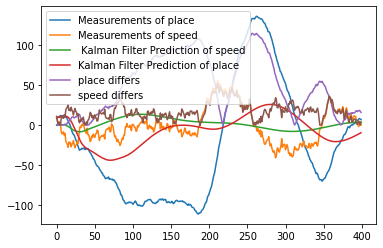

In [32]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 1, 400)
  print(noise1)
  noise2 = np.random.normal(0, 4, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed -np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **speed = 10 / place = 10 / place noise variance = 0.1 /speed noise variance = 0.1**

[[10.0], [1.0]] self.x = 2
[ 7.94063880e-02 -6.55745943e-02 -9.75667003e-02  1.79386523e-01
 -1.24860421e-02  2.43309674e-01  1.85953473e-01  1.05222141e-01
 -1.49154335e-01  3.90772418e-02 -1.74707932e-01 -4.97202559e-02
  1.68841479e-01  3.42163788e-02 -9.68716291e-02 -1.46042866e-01
  5.22482339e-02 -1.32692191e-01 -7.40676988e-02  9.46127248e-02
  1.07759974e-01  9.20021435e-02  1.05925350e-01 -1.68752560e-01
 -2.19952913e-02 -1.12832917e-01 -3.03821547e-02 -8.43627323e-02
  4.93715363e-02 -7.02659940e-02 -1.20491330e-01  5.20844338e-02
 -3.52312483e-03 -1.51694331e-02  5.75851312e-02  5.49362284e-02
 -3.58244045e-02  6.11371023e-02  1.19512266e-01  1.84569797e-02
  9.77237577e-02  1.85550249e-01 -1.15431824e-02 -7.41704956e-03
 -5.61576583e-02  2.15052386e-02  1.28578641e-01  5.34845519e-02
  1.20155076e-02  7.44206102e-02  4.37131277e-03  6.33789516e-02
  1.42701581e-02 -2.20901382e-02 -3.03056330e-02  5.69257448e-02
 -8.15625393e-02 -4.34822842e-02 -7.18400731e-02 -3.28317844e-0

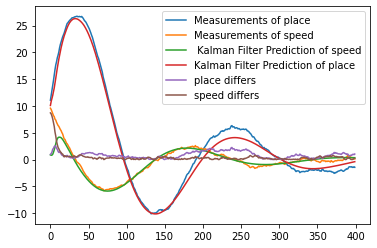

In [33]:
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 10. , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 400)
  print(noise1)
  noise2 = np.random.normal(0, 0.1, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **different places**

[[20.0], [10.0]] self.x = 2
[ 6.57194141e-02  5.65132589e-03 -2.83535540e-02 -1.30890331e-02
 -2.48056549e-01  2.08244997e-01  4.29540562e-02  1.77429943e-01
  6.07728861e-02 -1.27306337e-02  1.76220488e-02  4.87279519e-02
  1.21254717e-01  9.76061406e-02  9.49994923e-02  2.33131909e-01
 -3.83612682e-03 -8.16553758e-02 -1.54687110e-01  2.10719917e-01
  3.66453300e-01 -3.32932194e-02  4.26958666e-02 -3.67344636e-02
  1.46129339e-01 -1.35091237e-01  3.88600001e-02 -1.67549807e-02
  1.98974083e-01  1.45801722e-01  3.78705946e-02  5.83701691e-02
 -1.17246498e-01  9.25924305e-03 -6.51842372e-02  3.48768416e-02
  5.08920530e-02 -7.53779794e-02 -5.43700919e-02 -1.12843273e-01
  1.44116998e-01 -1.62668403e-01  2.12091268e-01 -8.91066252e-02
  2.89490944e-02 -5.35418155e-02 -1.02848277e-01  8.83726001e-03
 -6.83558612e-02 -2.09141449e-02  1.01503216e-01 -7.94577526e-02
 -9.67490170e-02  4.86998099e-02  8.98549199e-02  1.29407492e-01
  1.05640801e-01 -3.84159430e-02 -5.01637720e-02 -2.30618398e-

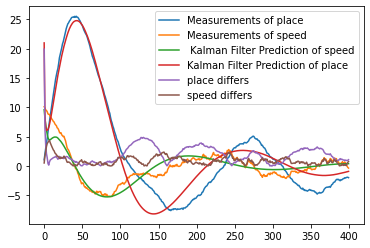

In [37]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[20.] , [10.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 5 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 400)
  print(noise1)
  noise2 = np.random.normal(0, 0.2, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()

# **different speeds**

[[0.0], [60.0]] self.x = 2
[-0.06025724  0.20773168 -0.07454964 -0.00887063 -0.05957861 -0.12788455
  0.09771735  0.10239987  0.06190051 -0.07232917 -0.12571063  0.08667714
 -0.09569037  0.08579284  0.03663701 -0.01499697 -0.08187055  0.11781491
  0.09130071 -0.06838151 -0.00852073  0.18842604 -0.11797065  0.17879964
  0.10786862 -0.18266642 -0.16870119  0.06760437 -0.07318344 -0.25316709
 -0.04383657  0.01425908 -0.07560762  0.09455937  0.16659952  0.02291388
 -0.16165241 -0.05746051 -0.18188626 -0.1037051   0.01655525  0.02911547
 -0.07989868  0.03581524 -0.02383837  0.02111936 -0.08904677 -0.13026502
  0.1575573  -0.09856821 -0.10549227 -0.12588409  0.04102102  0.02406873
 -0.02884137 -0.14256    -0.0148578  -0.16504229  0.05666479  0.1704613
 -0.03894318  0.02093348 -0.03794839  0.04464667  0.10533141  0.00271709
  0.10773395  0.05281148  0.00310243  0.0012945  -0.00692133  0.0594522
 -0.0836222  -0.00904092  0.20015087 -0.12160969 -0.0725728   0.11711814
  0.09343518  0.02852201 -

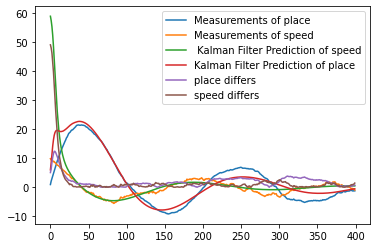

In [38]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = [[0.] , [60.]]):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        print(self.x , 'self.x =' , len(self.x))

    def predict(self, u = 5 ):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x 

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
def example():
  dt = 0.1
  k =2 
  m = 20
  F = 5 
  c = 4 
  F = np.array([[1, dt], [(dt * (-k) )/m, 1 - ((dt *c) / m)]])
  B= np.array([0 , dt / m])
  H = np.array([1, 0]).reshape(1, 2)
  Q = np.array([[0,0], [0,  0.5 * (dt**2)/(m ** 2)]])
  R = np.array([0.5]).reshape(1, 1)
  newmesuer = [ 0 , 10.]
  kf = KalmanFilter(F = F, H = H, Q = Q, R = R , B=B)
  predictions_place = []
  predictions_speed = []
  measurementsofplace = []
  measurementsofspeed = []
  noise1 =np.random.normal(0, 0.1, 400)
  print(noise1)
  noise2 = np.random.normal(0, 0.2, 400)
  for k in range(400):
    newmesuer = np.dot(F, newmesuer) + [noise1[k] , noise2[k]]
    print(newmesuer)
    measurementsofplace.append(newmesuer[0])
    measurementsofspeed.append(newmesuer[1])
  

  for z in measurementsofplace:
    a = kf.predict()
    place = a[0][0] 
    speed = a[1][0]
    predictions_place.append(np.dot(H, a)[0][0])
    predictions_speed.append(speed)
    kf.update(z)
  difference  = np.abs( measurementsofplace - np.ravel(predictions_place))
  difference2 = np.abs( measurementsofspeed - np.ravel(predictions_speed))
  print( 'PLACE diifer is :' , difference)
  print('speed differ is : ' ,difference2 )
  import matplotlib.pyplot as plt
  plt.plot(range(len(measurementsofplace)), measurementsofplace, label = 'Measurements of place')
  plt.plot(range(len(measurementsofspeed)), measurementsofspeed, label = 'Measurements of speed')
  plt.plot(range(len(predictions_speed)), predictions_speed, label = ' Kalman Filter Prediction of speed')
  plt.plot(range(len(predictions_place)), np.ravel(predictions_place), label = 'Kalman Filter Prediction of place')
  plt.plot(range(len(difference)), difference, label = 'place differs')
  plt.plot(range(len(difference2)), difference2, label = 'speed differs')

  plt.legend()
  plt.show()


if __name__ == '__main__':
    example()